In [1]:
import os
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
#from matplotlib.patches import Ellipse
from math import sqrt
import wfdb

In [2]:
###### 主程式碼 poincare plot #######
def plot_poincare(rr):
    #Credit : BJORN (in Kaggle) 
    rr_n = rr[:-1] #第0個元素到倒數第2個元素
    rr_n1 = rr[1:] #第1個元素到倒數第1(最後一個)個元素

    sd1 = np.sqrt(0.5) * np.std(rr_n1 - rr_n) #SD1的計算
    sd2 = np.sqrt(0.5) * np.std(rr_n1 + rr_n) #SD2的計算

    m = np.mean(rr)
    min_rr = np.min(rr)
    max_rr = np.max(rr)
    
    plt.figure(figsize=(10, 10))
    plt.title("Poincare plot")

    sns.scatterplot(x=rr_n, y=rr_n1, color="#51A6D8")

    plt.xlabel(r'$RR_n (ms)$')
    plt.ylabel(r'$RR_{n+1} (ms)$')
    

    e1 = Ellipse((m, m), 2*sd1, 2*sd2, angle=-45, linewidth=1.2, fill=False, color="k")
    plt.gca().add_patch(e1)

    plt.arrow(m, m, (max_rr-min_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)
    plt.arrow(m, m, (min_rr-max_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)

    plt.arrow(m, m, sd2 * np.sqrt(0.5), sd2 * np.sqrt(0.5), color="green", linewidth=5)
    plt.arrow(m, m, -sd1 * np.sqrt(0.5), sd1 * np.sqrt(0.5), color="red", linewidth=5)

    plt.text(max_rr, max_rr, "SD2", fontsize=20, color="green")
    plt.text(m-(max_rr-min_rr)*0.4-20, max_rr, "SD1", fontsize=20, color="red")
    
    return sd1, sd2

In [3]:
###### 主程式碼 stepping #######
def stepping(rr):
    rr_n = rr[:-1] #第0個元素到倒數第2個元素
    rr_n1 = rr[1:] #第1個元素到倒數第1(最後一個)個元素
    
    rrn_rrn1 = rr_n - rr_n1 # I1-I2, I2-I3, ...., I(n-2)-I(n-1), I(n-1) - I(n)
    Sum = 0 #sum_of_root_of_sum_of_2_square = 0 
    for i in range(len(rrn_rrn1)-1) : #假設資料長度是n，那麼兩兩相加
        #print("sqrt((rr {} - rr {} )**2 + (rr {} - rr {} )**2) = {}".format(i+1, i+2, i+2, i+3, sqrt(rrn_rrn1[i]**2 + rrn_rrn1[i+1]**2)))
        Sum += sqrt(rrn_rrn1[i]**2 + rrn_rrn1[i+1]**2)
    
    stepping = (Sum / (len(rr)-2) ) / (rr.sum() / len(rr))
    return stepping

In [4]:
def dispersion(sequence):
    n = len(sequence)
    diff_squared = np.sum(np.square(np.diff(sequence)))
    absolute_diff = np.sum(np.abs(np.diff(sequence)))
    dispersion = np.sqrt((1/(2*(n-1))) * diff_squared - ((1/((n-1)*np.sqrt(2))) * absolute_diff)**2) / ((1/(2*(n-1))) * (-sequence[0] - sequence[n-1] + 2*np.sum(sequence[:-1])))
    return dispersion


In [5]:
######## 主程式 畫cluster ################
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def plot_cluster(X, labels):
    """在上述程式碼中，我們使用 matplotlib.cm 模組的 rainbow 函數生成一個顏色映射，該映射根據分群數量平均分配顏色。使用 np.linspace 函數來指定顏色映射的範圍。接著，我們使用 colors[labels[index]] 選擇對應的顏色，並將其應用於散點圖的顏色。

    這種方法可以根據分群數量動態生成更多的顏色，因此可以適應更多的分群情況。您還可以根據需要選擇其他的預定義顏色映射，或者自訂一個顏色列表。
    """

    unique_labels = set(labels)

    colors = cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    for index in range(len(labels)): 
        if labels[index] == -1:
            plt.scatter(X[index, 0], X[index, 1], color='b', marker='o')
        else:
            label_color = colors[labels[index]]
            plt.scatter(X[index, 0], X[index, 1], color=label_color, marker='o')

    plt.show()
    return 

In [6]:
from sklearn.cluster import DBSCAN
import numpy as np
def poincare_clustering_3(rr,epslion,num_of__min_samples):
        
    rr_n = rr[:-1] #第0個元素到倒數第2個元素
    rr_n1 = rr[1:] #第1個元素到倒數第1(最後一個)個元素
    X = np.concatenate((rr_n.reshape(len(rr_n),1),rr_n1.reshape(len(rr_n1),1)), axis=1)
    
    db = DBSCAN(eps=epslion, min_samples=num_of__min_samples).fit(X)  #eps=100, min_samples=10
    labels = db.labels_
    """暫時
    print("labels = ",labels)
    print("type(labels)=",type(labels))
    暫時"""
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    """暫時
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("X = ", X)
    print("X.shape = ", X.shape)
    
    plt.figure()
    plot_cluster(X, labels)
    暫時"""
    return n_clusters_, labels

In [7]:
##############主程式碼1 的資料處裡自動化###################
def preprocessing_data(ndarray_of_a_signal, sampling_freq): 
    """
    ndarray_of_a_signal : a 1 dimensional ndarray.
    """
    # Detrending
    detrended_signal = nk.signal_detrend(ndarray_of_a_signal, order="auto")
    #暫時print(detrended_signal)

    #注意!!!!!有些peak會抓不準，例如n20，從而導致偽陽性。
    ecg_clean = nk.ecg_clean( detrended_signal, sampling_rate=128, method='neurokit') #記得先用reshape拉長 #因為record.p_signal是一個(38400(或230400), 1)的array，其實也就是兩層中括號，所以要拉成1維的。


    record_to_Series = pd.Series(ecg_clean)#detrended_clean_signal 
    record_to_Series.size #沒有c結尾檔名的長度 : 230400 = 128hz * 60sec * 30min = 30分鐘的訊號 ； c結尾檔名的長度 : 38400  = 128hz * 60sec * 5 min = 5分鐘的訊號。
    #奇數編號的記錄（例如 p15）包含遠離PAF的30分鐘ECG記錄；每對30分鐘記錄中的第二個（偶數編號ex p16）記錄包含在PAF發作之前的ECG記錄，可以通過檢查相同編號的延續記錄來驗證。

    #diff_sig_ECG=np.diff(record_to_Series[0:record_to_Series.size]) #record_to_Series.size 訊號全長# 紀錄時長(eg. 30分鐘 or 5分鐘)*60秒*sampling rate

    #distance=sampling rate*(30/60))= sampling rate*(一分鐘30下/60秒))，至於prominence=0.01是原作者試出來的
    peaks_ECG, info = nk.ecg_peaks(record_to_Series, sampling_rate=128, method='neurokit2', correct_artifacts=False) #method='rodrigues2021'
    peak_locations = info['ECG_R_Peaks']

    #暫時print("peak_locations = ",peak_locations)
    #暫時print("type(peak_locations)",type(peak_locations))
    #暫時print("peak_locations.size = ",peak_locations.shape)


    rr_ECG = np.diff(peak_locations)
    corr_rr_ECG = rr_ECG*(1000/sampling_freq) #Sampling rate 是128HZ意思就是1秒sampling 128次，也就是說1秒的時間被分成了128等分，又1秒=1000毫秒，所以點跟點之間實際上差了1000/128毫秒。
    """暫時
    plt.figure()
    plt.plot(record_to_Series)
    plt.scatter(peak_locations, record_to_Series[peak_locations], color="red")
    plt.xlim(0, 1000)
    plt.ylim(-1.5, 4)

    import seaborn as sns
    from matplotlib.patches import Ellipse
    sd1_2, sd2_2 = plot_poincare(corr_rr_ECG) 
    plt.xlim(0, 1500)
    plt.ylim(0, 1500)
    print("SD1: %.3f ms" % sd1_2)
    print("SD2: %.3f ms" % sd2_2)
    print("stepping = ", stepping(corr_rr_ECG))
    print("calculate_ratio =", calculate_ratio(corr_rr_ECG))
    print("dispersion = ", dispersion(corr_rr_ECG))
    暫時"""
    return corr_rr_ECG


In [8]:
######將wfdb 檔 load data 成 DataFrame的過程自動化##########
def import_data():
    data_list = []  # 儲存每個檔案的資料
    N = 50
    for i in range(1, N+1):  # 讀取 n01 到 n50 的檔案
        record_name = 'p{:02d}'.format(i)  # 根據命名規則生成檔案名稱
        record_path = os.path.abspath('D:/kaggle/paf-prediction-challenge-database-1.0.0/' + record_name)

        # 讀取檔案並獲取所需通道的資料
        record = wfdb.rdrecord(record_path, channels=[0]) #有兩個channel ，讀取第0個
        data = record.p_signal.flatten() #我把一個ndarray化做一個1維向量
        print(data)
        # 將資料添加到列表中
        data_list.append(data)
        
        # 將列表轉換為 DataFrame
        df = pd.DataFrame(data_list)
        
    return df, record.fs

In [9]:
def bulk_preprocessing(file_name):
    sampling_freq = 128 #可由record.fs的值決定
    df_csv = pd.read_csv("D:/kaggle/"+file_name, index_col=0) #第0個column作為index，所以index_col=0
    
    list_of_rr =[]
    list_of_labels = []
    
    for i in range(df_csv.shape[0]): #例如 : df_normal.shape[0]表示"row"的數量；df_normal.shape[1]表示"column"的數量
        rr = df_csv.iloc[i].array
        processed_signal = preprocessing_data(rr[:-1],sampling_freq)
        list_of_rr.append(processed_signal)
        list_of_labels.append(rr[-1])
        
    return list_of_rr, list_of_labels #Return a list of each patient(normal) RR intervals and a list of labels

In [11]:
list_of_normal_rr, list_of_normal_labels = bulk_preprocessing("paf_50normal_ECG_data.csv")
print("list_of_normal_rr=",list_of_normal_rr)
print("list_of_normal_labels=", list_of_normal_labels)


list_of_normal_rr= [array([703.125 , 710.9375, 710.9375, ..., 648.4375, 632.8125, 640.625 ]), array([695.3125, 703.125 , 695.3125, ..., 750.    , 757.8125, 765.625 ]), array([640.625 , 632.8125, 632.8125, ..., 695.3125, 703.125 , 703.125 ]), array([554.6875, 937.5   , 757.8125, ..., 718.75  , 718.75  , 710.9375]), array([648.4375, 648.4375, 648.4375, ..., 757.8125, 773.4375, 773.4375]), array([656.25  , 640.625 , 632.8125, ..., 515.625 , 523.4375, 507.8125]), array([1070.3125, 1070.3125, 1070.3125, ..., 1000.    , 1023.4375,
       1007.8125]), array([968.75  , 960.9375, 976.5625, ..., 968.75  , 968.75  , 968.75  ]), array([687.5   , 656.25  , 695.3125, ..., 671.875 , 687.5   , 593.75  ]), array([ 742.1875,  742.1875,  820.3125, ..., 1328.125 ,  703.125 ,
        765.625 ]), array([859.375 , 859.375 , 867.1875, ..., 867.1875, 859.375 , 859.375 ]), array([812.5   , 804.6875, 804.6875, ..., 851.5625, 812.5   , 835.9375]), array([796.875 , 781.25  , 789.0625, ..., 757.8125, 773.4375, 773.

In [26]:
#list_of_patients_rr, list_of_patients_labels = bulk_preprocessing("paf_50patients_ECG_data.csv")
print("list_of_patients_rr=",len(list_of_patients_rr))
print("list_of_patients_labels=", len(list_of_patients_labels))

list_of_patients_rr= 50
list_of_patients_labels= 50


In [13]:
#########由預處理陣列讀取的 資料預處理自動化 3 #################
def featuring(list_rr, list_labels, eps, min_samples):
    #file_name = "paf_50normal_ECG_data.csv"
    
    sampling_freq = 128 #可由record.fs的值決定

    df_read_in = pd.DataFrame({'n_clusters' : [],'Stepping' : [], 'Dispersion' : [], 'Labels' : []})
    for i in range(len(list_rr)): #例如 : df_normal.shape[0]表示"row"的數量；df_normal.shape[1]表示"column"的數量
        processed_signal = list_rr[i]
        n_clusters_, labels = poincare_clustering_3(processed_signal,eps, min_samples) #eps=100, min_samples=10
        new_row = pd.DataFrame({'n_clusters' : n_clusters_, 'Stepping': stepping(processed_signal), 'Dispersion' : dispersion(processed_signal), 'Labels' : int(list_labels[i])}, index=[0])
        df_read_in = pd.concat([df_read_in, new_row],ignore_index = True)

    #display(df_read_in)
    return df_read_in

In [14]:
def renew_feature_CSV_2(eps, min_samples): 
    #這個函數裡面list_of_normal_rr, list_of_normal_labels 和list_of_patients_rr, list_of_patients_labels
    #是全局變數，要小心
    df_normal = featuring(list_of_normal_rr, list_of_normal_labels, eps, min_samples)
    df_patients = featuring(list_of_patients_rr, list_of_patients_labels, eps, min_samples)
    df_paf = pd.concat([df_normal, df_patients],ignore_index = True)
    df_paf.to_csv("D:/kaggle/paf_featured_ECG_data.csv")
    return df_paf

In [34]:
paf_features = renew_feature_CSV_2(120,14) #120,10
display(paf_features)

,n_clusters,Stepping,Dispersion,Labels
0,1.0,0.012402,0.006353,0.0
1,1.0,0.012190,0.005152,0.0
2,2.0,0.054498,0.083592,0.0
3,4.0,0.114610,0.152949,0.0
4,1.0,0.013556,0.005703,0.0
...,...,...,...,...
95,1.0,0.019548,0.024066,1.0
96,1.0,0.043039,0.047586,1.0
97,1.0,0.235859,0.186096,1.0
98,1.0,0.020133,0.018093,1.0


Confusion matrix, without normalization
[[11  2]
 [ 5  7]]
Normalized confusion matrix
[[0.85 0.15]
 [0.42 0.58]]


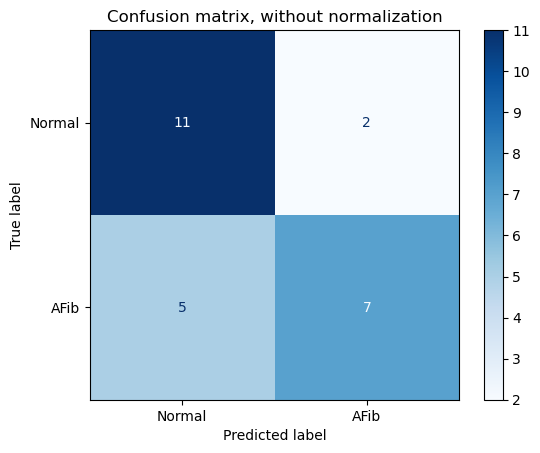

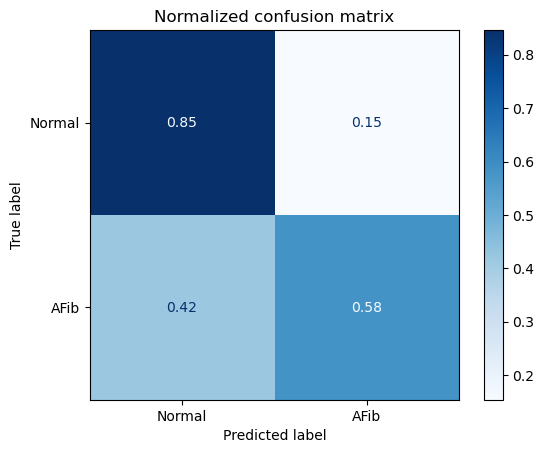

In [75]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# import some data to play with
iris = datasets.load_iris()
X = paf_features.values[:,:3] #training set
y = paf_features.values[:,3] #labels
class_names = ["Normal","AFib"] #string array, ["species 1", "species 2", "species 3", ...]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #training set and labels

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="rbf",gamma=13, C=40).fit(X_train, y_train) # kernel="linear"  #gamma=3, C=1.7
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

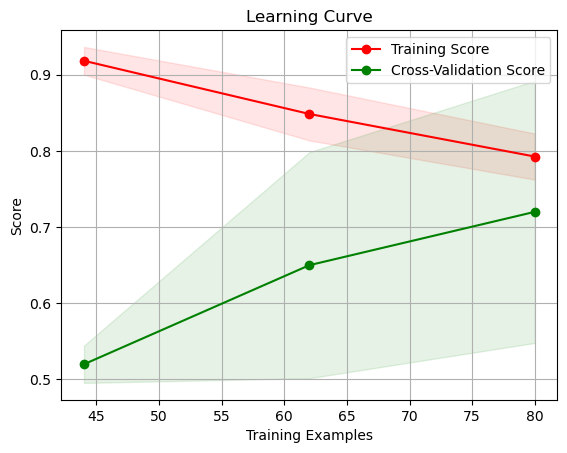

In [76]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Compute the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the training scores with error bars
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")

# Plot the cross-validation scores with error bars
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()
